
# 1.2.3 Steel Industry Energy Consumption 

## Dataset Context
The **Steel Industry Energy Consumption** dataset was collected from a smart small-scale steel industry in Gwangyang, South Korea (DAEWOO Steel Co. Ltd).  
It contains **35,040 records** describing energy usage, power factors, CO₂ emissions, and load types.

### Objective
Analyze and understand energy consumption patterns in relation to time, power variables, and load type.

Source: [UCI Machine Learning Repository - Steel Industry Energy Consumption](https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption)


## Modelo de Regresion Lineal Multiple 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns





### Cargar dataset

In [2]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 5)

# Load dataset
path = 'D:\Projects\steel-energy-mlops\data\clean\steel_energy_cleaned.csv'
df = pd.read_csv(path)

print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

# Asegurar tipado correcto de 'date' (era object)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.head()

Rows: 32966 | Columns: 11


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Angel\AppData\Local\Temp\ipykernel_45104\4233829968.py:5: SyntaxWarning: invalid escape sequence '\P'
  path = 'D:\Projects\steel-energy-mlops\data\clean\steel_energy_cleaned.csv'


,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type
0,2018-01-01 00:30:00,-0.711076,-0.535162,-0.53272,-0.714533,-0.749127,0.499747,-1.654049,Weekday,Monday,Light_load
1,2018-01-01 00:45:00,-0.734176,-0.609288,-0.53272,-0.714533,-0.563485,0.499747,-1.617723,Weekday,Monday,Light_load
2,2018-01-01 01:00:00,-0.732048,-0.591699,-0.53272,-0.714533,-0.679313,0.499747,-1.581398,Weekday,Monday,Light_load
3,2018-01-01 01:15:00,-0.716547,-0.532649,-0.53272,-0.714533,-0.857550,0.499747,-1.545072,Weekday,Monday,Light_load
4,2018-01-01 01:30:00,-0.732960,-0.591699,-0.53272,-0.714533,-0.696766,0.499747,-1.508747,Weekday,Monday,Light_load


### Preprocesamiento

NOTAS: 
1. No se excluyen datos atipicos
2. date se convierte de object a datetime64
3. Week_Statua,  Load_Type, Day_of_week se codifican como OneHot
6. Predictores X - data, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM, WeekStatus, Load_Type
7. Target Y- Usage_kWh


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32966 entries, 0 to 32965
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  12236 non-null  datetime64[ns]
 1   usage_kwh                             32966 non-null  float64       
 2   lagging_current_reactive.power_kvarh  32966 non-null  float64       
 3   leading_current_reactive_power_kvarh  32966 non-null  float64       
 4   co2(tco2)                             32966 non-null  float64       
 5   lagging_current_power_factor          32966 non-null  float64       
 6   leading_current_power_factor          32966 non-null  float64       
 7   nsm                                   32966 non-null  float64       
 8   weekstatus                            32624 non-null  object        
 9   day_of_week                           32663 non-null  object        
 10

### Limpieza

In [4]:
# Eliminar filas nulas
df = df.dropna()

# Ordenar cronológicamente
df = df.sort_values(by="date")



### Caracteristicas de tiempo derivadas de 'date'

In [5]:
df['hour'] = df['date'].dt.hour
df['dayofweek_num'] = df['date'].dt.dayofweek  # 0=Mon,...,6=Sun
df['month'] = df['date'].dt.month

### One Hot Encoding para 'WeekStatus, Day_of_week y Load_Type

In [6]:
df = pd.get_dummies(df, columns=['weekstatus', 'day_of_week', 'load_type'], drop_first=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11877 entries, 91 to 30621
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  11877 non-null  datetime64[ns]
 1   usage_kwh                             11877 non-null  float64       
 2   lagging_current_reactive.power_kvarh  11877 non-null  float64       
 3   leading_current_reactive_power_kvarh  11877 non-null  float64       
 4   co2(tco2)                             11877 non-null  float64       
 5   lagging_current_power_factor          11877 non-null  float64       
 6   leading_current_power_factor          11877 non-null  float64       
 7   nsm                                   11877 non-null  float64       
 8   hour                                  11877 non-null  int32         
 9   dayofweek_num                         11877 non-null  int32         
 10  mo

In [8]:
df

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,hour,dayofweek_num,month,weekstatus_Weekend,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,load_type_Maximum_load,load_type_Medium_load
91,2018-01-01 00:00:00,-0.728705,-0.597981,-0.532720,-0.714533,-0.562427,0.499747,-1.726700,0,0,1,False,True,False,False,False,False,False,False,False
0,2018-01-01 00:30:00,-0.711076,-0.535162,-0.532720,-0.714533,-0.749127,0.499747,-1.654049,0,0,1,False,True,False,False,False,False,False,False,False
1,2018-01-01 00:45:00,-0.734176,-0.609288,-0.532720,-0.714533,-0.563485,0.499747,-1.617723,0,0,1,False,True,False,False,False,False,False,False,False
2,2018-01-01 01:00:00,-0.732048,-0.591699,-0.532720,-0.714533,-0.679313,0.499747,-1.581398,1,0,1,False,True,False,False,False,False,False,False,False
3,2018-01-01 01:15:00,-0.716547,-0.532649,-0.532720,-0.714533,-0.857550,0.499747,-1.545072,1,0,1,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30617,2018-12-12 22:30:00,-0.703477,-0.600493,-0.517542,-0.714533,-0.159938,0.498755,1.542596,22,2,12,False,False,False,False,False,False,True,True,False
30618,2018-12-12 23:00:00,-0.704693,-0.607403,-0.507883,-0.714533,-0.122915,0.810312,1.615247,23,2,12,False,False,False,False,False,False,True,True,False
30619,2018-12-12 23:15:00,-0.706821,-0.634415,-0.488565,-0.714533,0.061141,0.489826,1.651572,23,2,12,False,False,False,False,False,False,True,False,False
30620,2018-12-12 23:30:00,-0.708037,-0.661427,-0.463727,-0.714533,0.259476,0.475276,1.687898,23,2,12,False,False,False,False,False,False,True,False,False


### Division de datos (no-temporizado / basado en features)

In [9]:
#Todas las variables del dataset
features = [
    # Eléctricas / de estado
    'lagging_current_reactive.power_kvarh',
    'leading_current_reactive_power_kvarh', 'co2(tco2)', 
    'lagging_current_power_factor',
    'leading_current_power_factor',
    'nsm',
    # Tiempo
    'hour', 'dayofweek_num', 'month',
    # One-hot binaria
    'weekstatus_Weekend','day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Thursday',
    'day_of_week_Tuesday','day_of_week_Wednesday','load_type_Maximum_load',
    'load_type_Medium_load'
]

In [10]:
# Division de datos 80%-20%
target = 'usage_kwh'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


### Entrenamiento Regresion Lineal Multiple

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


### Evaluacion

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:,.2f}')
print(f'MAE : {mae:,.2f}')
print(f'R²  : {r2:,.3f}')


RMSE: 0.24
MAE : 0.10
R²  : 0.947


,feature,coef
2,co2(tco2),0.769775
0,lagging_current_reactive.power_kvarh,0.162928
17,load_type_Medium_load,0.088232
16,load_type_Maximum_load,0.075997
3,lagging_current_power_factor,0.068282
4,leading_current_power_factor,0.042603
14,day_of_week_Tuesday,0.031035
12,day_of_week_Sunday,0.014295
9,weekstatus_Weekend,0.009411
10,day_of_week_Monday,0.007985


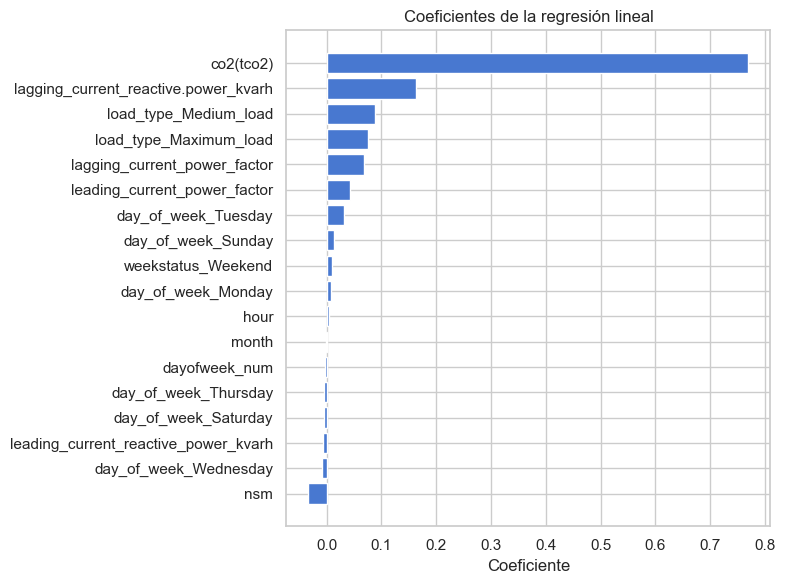

In [13]:
coef = pd.DataFrame({'feature': features, 'coef': lr.coef_}).sort_values('coef', ascending=False)
display(coef)

# Gráfico sencillo
plt.figure(figsize=(8,6))
plt.barh(coef['feature'], coef['coef'])
plt.gca().invert_yaxis()
plt.title('Coeficientes de la regresión lineal')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()


### Ejemplo 1

In [14]:
# Datos de entrada


ejemplo1 = pd.DataFrame({
    'lagging_current_reactive.power_kvarh': [32.5],
    'leading_current_reactive_power_kvarh': [11.8],
    'co2(tco2)':[10],
    'lagging_current_power_factor': [93.5],
    'leading_current_power_factor': [87.2],
    'nsm': [36000],                # Seconds since midnight (10:00 a.m.)
    'hour': [10],
    'dayofweek_num': [2],          # 0=Mon ... 6=Sun
    'month': [3],
    'weekstatus_Weekend': [False],
    'day_of_week_Monday': [False],
    'day_of_week_Saturday': [False],
    'day_of_week_Sunday': [False],
    'day_of_week_Thursday': [False],
    'day_of_week_Tuesday': [False],
    'day_of_week_Wednesday': [True],
    'load_type_Maximum_load': [True],
    'load_type_Medium_load': [False]
})

#Prediccion

ejemplo1 = ejemplo1[features]
prediction = lr.predict(ejemplo1)
print(f"Prediccion Usage_kWh: {prediction[0]:.2f}")



Prediccion Usage_kWh: -1169.17


In [15]:
import joblib
joblib.dump(lr,"LR_model_V0M0.pkl")

['LR_model_V0M0.pkl']